#Exercise 5

In [45]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

In [46]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Three gangs

Softmax regresion

In [47]:
s = [0.2, 0.1, 0.6, 0.1]
exps = [np.exp(i) for i in s]
sum_of_exps = sum(exps)
softmax = [j/sum_of_exps for j in exps]

Dataset:

In [48]:
x_label0 = np.random.normal(1, 1.5, (1000, 1))
y_label0 = np.random.normal(1, 1.5, (1000, 1))
x_label1 = np.random.normal(5, 1.5, (1000, 1))
y_label1 = np.random.normal(4, 1.5, (1000, 1))
x_label2 = np.random.normal(8, 1.5, (1000, 1))
y_label2 = np.random.normal(0, 1.5, (1000, 1))

data_label0 = np.concatenate([x_label0, y_label0],axis=1)
data_label1 = np.concatenate([x_label1, y_label1],axis=1)
data_label2 = np.concatenate([x_label2, y_label2],axis=1)
points = np.concatenate([data_label0, data_label1, data_label2],axis=0)

Kodowanie one-hot

In [49]:
labels = np.array([[1., 0., 0.]] * len(data_label0) + [[0., 1., 0.]] * len(data_label1) + [[0.,0., 1.]] * len(data_label2))

In [50]:
points.shape,labels.shape

((3000, 2), (3000, 3))

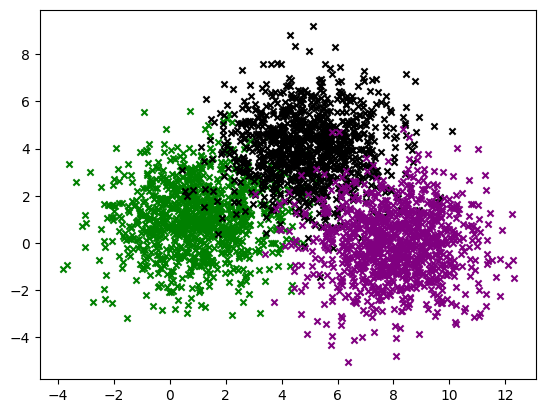

In [51]:
plt.scatter(x_label0, y_label0, c='green', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='purple', marker='x', s=20)
plt.show()

In [52]:
x_label1

array([[ 4.66179264],
       [ 2.81220389],
       [ 5.1105326 ],
       [ 5.49564859],
       [ 5.18771842],
       [ 2.99123319],
       [ 4.02615339],
       [ 7.38994744],
       [ 4.55323899],
       [ 6.54918646],
       [ 3.52333869],
       [ 6.90294365],
       [ 5.73547702],
       [ 6.09111733],
       [ 2.18120709],
       [ 7.41699733],
       [ 4.4967585 ],
       [ 6.15548139],
       [ 6.26956923],
       [ 4.53798337],
       [ 4.22923426],
       [ 5.69753815],
       [ 4.41245184],
       [ 4.52593597],
       [ 4.98422527],
       [ 2.64253971],
       [10.09733684],
       [ 5.2783488 ],
       [ 1.43979195],
       [ 8.28939966],
       [ 3.44393909],
       [ 6.91863418],
       [ 5.79938046],
       [ 3.17676035],
       [ 4.66668774],
       [ 3.32592152],
       [ 5.51884584],
       [ 4.68246227],
       [ 3.6336846 ],
       [ 6.85145089],
       [ 3.47684864],
       [ 3.06401008],
       [ 4.0838857 ],
       [ 5.2832632 ],
       [ 4.8306507 ],
       [ 3

In [53]:
#def loss_fn_grad(y, y_model):
# return tf.reduce_mean(-y*tf.math.log(y_model)-(1-y)*tf.math.log(1-y_model))



In [54]:
def split_dataset(data_points, label,subset_size):
    arr = np.arange(len(data_points))
    l=len(data_points)
    s=int(subset_size*l)
    np.random.shuffle(arr)
    data_points_val =data_points[arr[0:s]]
    label_val = label[arr[0:s]]
    data_points_train = data_points[arr[:int(l*(1-subset_size))]]
    label_train = label[arr[:int(l*(1-subset_size))]]

    return data_points_train,label_train,data_points_val,label_val

In [55]:
def subset_dataset(x_dataset, y_dataset,label,subset_size):
    arr = np.arange(len(x_dataset))
    np.random.shuffle(arr)
    x_train = x_dataset[arr[0:subset_size]]
    y_train = y_dataset[arr[0:subset_size]]
    label_train = label[arr[0:subset_size]]
    return x_train,y_train,label_train

In [56]:
def subset_dataset_concatenated(data,label,subset_size):
    arr = np.arange(len(data))
    np.random.shuffle(arr)
    data_train = data[arr[0:subset_size]]
    label_train = label[arr[0:subset_size]]
    return data_train,label_train

In [57]:
labels.shape

(3000, 3)

In [58]:
Loss = []
Val_loss = []
epochs = 5000
learning_rate = 0.1
batch_size = 20

w = tf.Variable(np.random.random((2, 3)))
b = tf.Variable(np.random.random((3)))
data = points
data_train,label_train,data_val,label_val = split_dataset(data,labels,0.2)
for _ in range(epochs):

  data_batch,labels_batch = subset_dataset_concatenated(data_train,label_train,batch_size)
  data_val_batch,labels_val_batch = subset_dataset_concatenated(data_val,label_val,batch_size)

  with tf.GradientTape() as tape:

    pred_l=tf.nn.softmax(tf.matmul(data_batch, w) + b)
    pred_l_val=tf.nn.softmax(tf.matmul(data_val_batch, w) + b)


    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_batch, pred_l)
    Loss.append(loss.numpy())

    val_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_val_batch, pred_l_val)
    Val_loss.append(val_loss.numpy())

    print("loss",loss,"val_loss",val_loss)

  dloss_dw,dloss_db = tape.gradient(loss, [w, b])


  w.assign_sub(learning_rate*dloss_dw )
  b.assign_sub(learning_rate*dloss_db )

loss tf.Tensor(0.7794742388434337, shape=(), dtype=float64) val_loss tf.Tensor(0.8142714468370269, shape=(), dtype=float64)
loss tf.Tensor(0.8227390251926595, shape=(), dtype=float64) val_loss tf.Tensor(0.7839650766453529, shape=(), dtype=float64)
loss tf.Tensor(0.7871608467344661, shape=(), dtype=float64) val_loss tf.Tensor(0.8132895283064465, shape=(), dtype=float64)
loss tf.Tensor(0.7753731329792352, shape=(), dtype=float64) val_loss tf.Tensor(0.7752715394521849, shape=(), dtype=float64)
loss tf.Tensor(0.7828852626130962, shape=(), dtype=float64) val_loss tf.Tensor(0.7734343232827083, shape=(), dtype=float64)
loss tf.Tensor(0.7755305980882262, shape=(), dtype=float64) val_loss tf.Tensor(0.7560353500795148, shape=(), dtype=float64)
loss tf.Tensor(0.7770071012809552, shape=(), dtype=float64) val_loss tf.Tensor(0.7450380134550336, shape=(), dtype=float64)
loss tf.Tensor(0.7507468175153807, shape=(), dtype=float64) val_loss tf.Tensor(0.7611137933954482, shape=(), dtype=float64)
loss tf.

In [59]:
print(data_train.size,label_train.size,data_val.size,label_val.size)

4800 7200 1200 1800


In [60]:
print(data_train.shape,label_train.shape,data_val.shape,label_val.shape)

(2400, 2) (2400, 3) (600, 2) (600, 3)


In [61]:
np.max(Loss),np.min(Loss)

(0.8227390251926595, 0.572023823731623)

In [62]:
np.max(Val_loss),np.min(Val_loss)

(0.8142714468370269, 0.5716919853930085)

In [63]:
print(w.numpy())
print(b.numpy())

[[-0.77754904  0.20680772  0.97694973]
 [ 0.51297229  1.7580681  -0.45759847]]
[ 4.57287348 -1.35844996 -1.4956957 ]


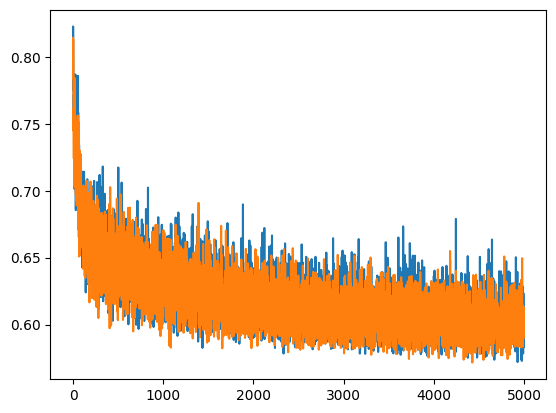

In [64]:
plt.plot(Loss)
plt.plot(Val_loss)
plt.show()

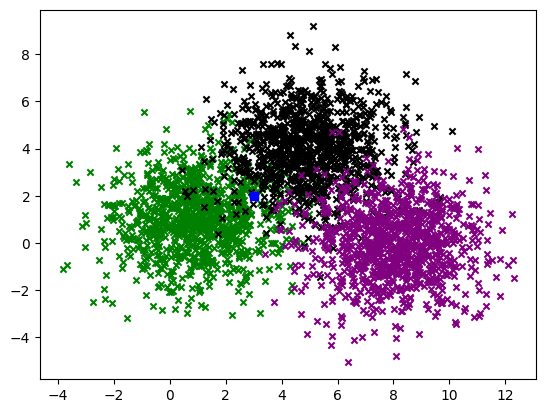

In [65]:
x=3.0
y=2.0
plt.scatter(x_label0, y_label0, c='green', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='purple', marker='x', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

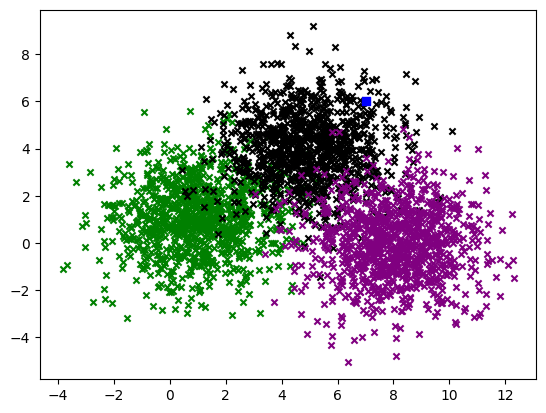

In [66]:
x=7.0
y=6.0
plt.scatter(x_label0, y_label0, c='green', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='purple', marker='x', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

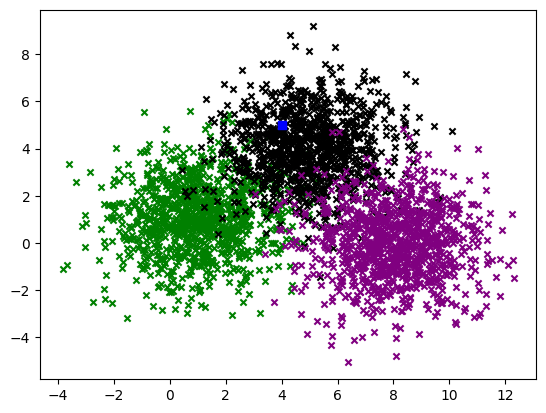

In [67]:
x=4.0
y=5.0
plt.scatter(x_label0, y_label0, c='green', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='purple', marker='x', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

#Hiperparametria

##Learning rate 0.01

In [68]:
Loss = []
Val_loss = []
epochs = 5000
learning_rate = 0.01
batch_size = 20

w = tf.Variable(np.random.random((2, 3)))
b = tf.Variable(np.random.random((3)))
data = points
data_train,label_train,data_val,label_val = split_dataset(data,labels,0.2)
for _ in range(epochs):

  data_batch,labels_batch = subset_dataset_concatenated(data_train,label_train,batch_size)
  data_val_batch,labels_val_batch = subset_dataset_concatenated(data_val,label_val,batch_size)

  with tf.GradientTape() as tape:

    pred_l=tf.nn.softmax(tf.matmul(data_batch, w) + b)
    pred_l_val=tf.nn.softmax(tf.matmul(data_val_batch, w) + b)


    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_batch, pred_l)
    Loss.append(loss.numpy())

    val_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_val_batch, pred_l_val)
    Val_loss.append(val_loss.numpy())

    print("loss",loss,"val_loss",val_loss)

  dloss_dw,dloss_db = tape.gradient(loss, [w, b])


  w.assign_sub(learning_rate*dloss_dw )
  b.assign_sub(learning_rate*dloss_db )

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
loss tf.Tensor(0.7977209985278474, shape=(), dtype=float64) val_loss tf.Tensor(0.7997978879100578, shape=(), dtype=float64)
loss tf.Tensor(0.7827705863579125, shape=(), dtype=float64) val_loss tf.Tensor(0.7717208065625647, shape=(), dtype=float64)
loss tf.Tensor(0.7757744826063329, shape=(), dtype=float64) val_loss tf.Tensor(0.7919511611913492, shape=(), dtype=float64)
loss tf.Tensor(0.7859130460999362, shape=(), dtype=float64) val_loss tf.Tensor(0.7731233861194312, shape=(), dtype=float64)
loss tf.Tensor(0.8046920774927587, shape=(), dtype=float64) val_loss tf.Tensor(0.7855532180188696, shape=(), dtype=float64)
loss tf.Tensor(0.7798955962656091, shape=(), dtype=float64) val_loss tf.Tensor(0.7875939760368222, shape=(), dtype=float64)
loss tf.Tensor(0.790470124514483, shape=(), dtype=float64) val_loss tf.Tensor(0.7900630885934422, shape=(), dtype=float64)
loss tf.Tensor(0.7740679204437608, shape=(), dtype=float64) val_loss

In [69]:
print(data_train.size,label_train.size,data_val.size,label_val.size)

4800 7200 1200 1800


In [70]:
print(data_train.shape,label_train.shape,data_val.shape,label_val.shape)

(2400, 2) (2400, 3) (600, 2) (600, 3)


In [71]:
np.max(Loss),np.min(Loss)

(0.8046920774927587, 0.5986084332051266)

In [72]:
np.max(Val_loss),np.min(Val_loss)

(0.8024314901495992, 0.5923339050351574)

In [73]:
print(w.numpy())
print(b.numpy())

[[ 0.15632094  0.75954839  1.24254765]
 [ 1.15656334  1.36019651 -0.08130425]]
[ 0.89811175 -0.08275817 -0.18440522]


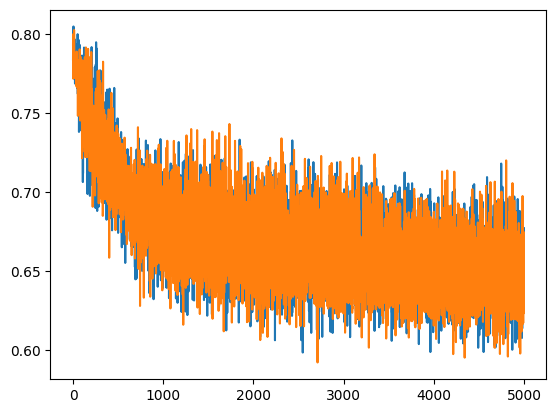

In [74]:
plt.plot(Loss)
plt.plot(Val_loss)
plt.show()

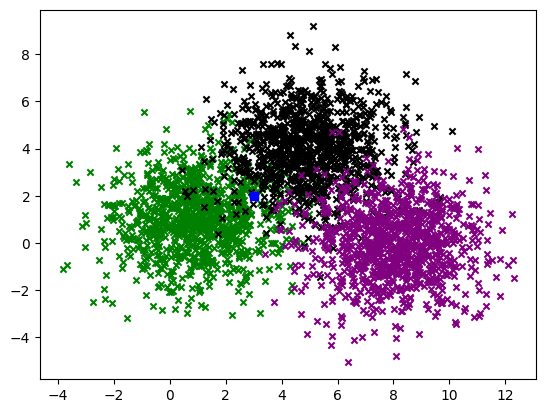

In [75]:
x=3.0
y=2.0
plt.scatter(x_label0, y_label0, c='green', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='purple', marker='x', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

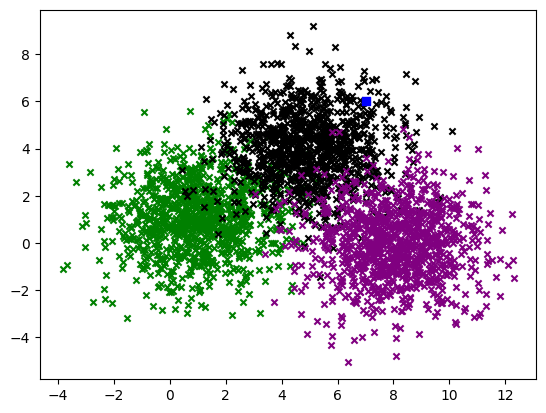

In [76]:
x=7.0
y=6.0
plt.scatter(x_label0, y_label0, c='green', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='purple', marker='x', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

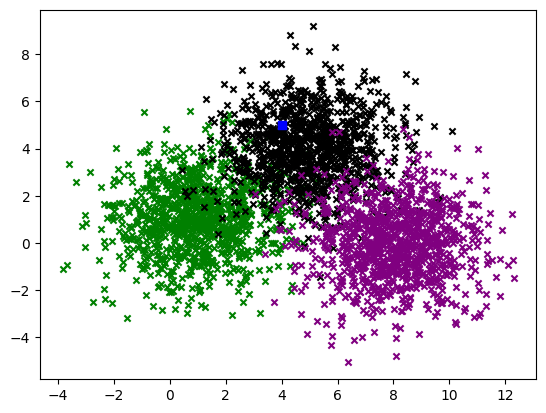

In [77]:
x=4.0
y=5.0
plt.scatter(x_label0, y_label0, c='green', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='purple', marker='x', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

Learning rate 0.001

In [78]:
Loss = []
Val_loss = []
epochs = 5000
learning_rate = 0.001
batch_size = 20

w = tf.Variable(np.random.random((2, 3)))
b = tf.Variable(np.random.random((3)))
data = points
data_train,label_train,data_val,label_val = split_dataset(data,labels,0.2)
for _ in range(epochs):

  data_batch,labels_batch = subset_dataset_concatenated(data_train,label_train,batch_size)
  data_val_batch,labels_val_batch = subset_dataset_concatenated(data_val,label_val,batch_size)

  with tf.GradientTape() as tape:

    pred_l=tf.nn.softmax(tf.matmul(data_batch, w) + b)
    pred_l_val=tf.nn.softmax(tf.matmul(data_val_batch, w) + b)


    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_batch, pred_l)
    Loss.append(loss.numpy())

    val_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_val_batch, pred_l_val)
    Val_loss.append(val_loss.numpy())

    print("loss",loss,"val_loss",val_loss)

  dloss_dw,dloss_db = tape.gradient(loss, [w, b])


  w.assign_sub(learning_rate*dloss_dw )
  b.assign_sub(learning_rate*dloss_db )

loss tf.Tensor(0.8518776592276112, shape=(), dtype=float64) val_loss tf.Tensor(0.8202362652151589, shape=(), dtype=float64)
loss tf.Tensor(0.8147901495144172, shape=(), dtype=float64) val_loss tf.Tensor(0.8463748734130458, shape=(), dtype=float64)
loss tf.Tensor(0.866697794267498, shape=(), dtype=float64) val_loss tf.Tensor(0.8384185332592267, shape=(), dtype=float64)
loss tf.Tensor(0.7923347266069005, shape=(), dtype=float64) val_loss tf.Tensor(0.7991891180897482, shape=(), dtype=float64)
loss tf.Tensor(0.824717849867062, shape=(), dtype=float64) val_loss tf.Tensor(0.830055502570341, shape=(), dtype=float64)
loss tf.Tensor(0.8505570122075593, shape=(), dtype=float64) val_loss tf.Tensor(0.8007259354317775, shape=(), dtype=float64)
loss tf.Tensor(0.8041402056084259, shape=(), dtype=float64) val_loss tf.Tensor(0.8112226948104995, shape=(), dtype=float64)
loss tf.Tensor(0.8456822007496967, shape=(), dtype=float64) val_loss tf.Tensor(0.8077816688615787, shape=(), dtype=float64)
loss tf.Ten

In [79]:
print(data_train.size,label_train.size,data_val.size,label_val.size)

4800 7200 1200 1800


In [80]:
print(data_train.shape,label_train.shape,data_val.shape,label_val.shape)

(2400, 2) (2400, 3) (600, 2) (600, 3)


In [81]:
np.max(Loss),np.min(Loss)

(0.8925800397751317, 0.7366488493781577)

In [82]:
np.max(Val_loss),np.min(Val_loss)

(0.8893945746369688, 0.7276200280485948)

In [83]:
print(w.numpy())
print(b.numpy())

[[0.71594753 0.22610428 0.27433853]
 [0.84671485 0.5327345  0.49550385]]
[1.0365432  0.85105495 0.56822219]


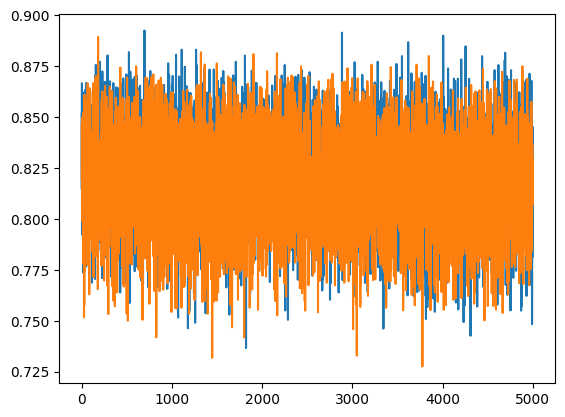

In [84]:
plt.plot(Loss)
plt.plot(Val_loss)
plt.show()

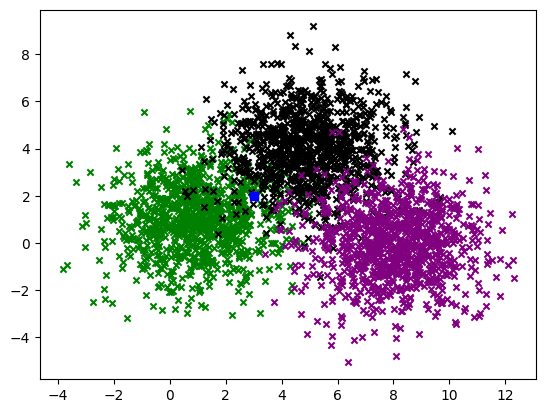

In [85]:
x=3.0
y=2.0
plt.scatter(x_label0, y_label0, c='green', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='purple', marker='x', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

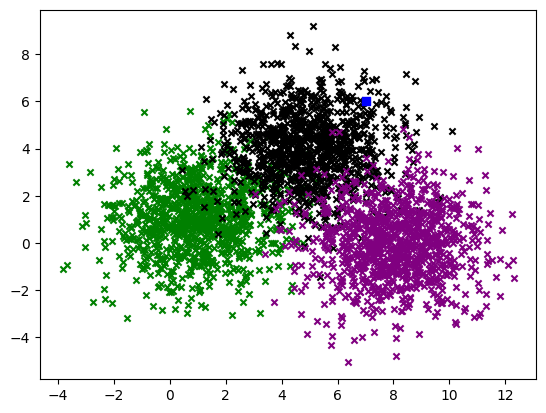

In [86]:
x=7.0
y=6.0
plt.scatter(x_label0, y_label0, c='green', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='purple', marker='x', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

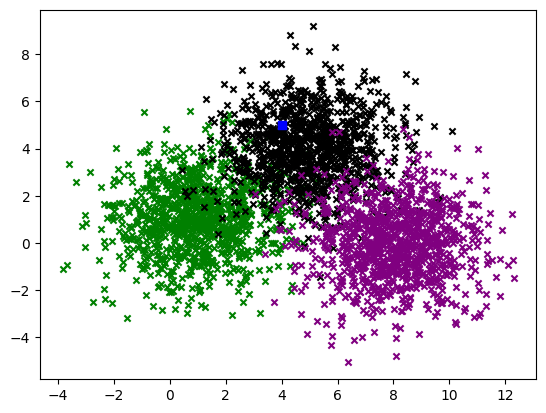

In [87]:
x=4.0
y=5.0
plt.scatter(x_label0, y_label0, c='green', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='purple', marker='x', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

#Number of epchos - 100

In [88]:
Loss = []
Val_loss = []
epochs = 100
learning_rate = 0.1
batch_size = 20

w = tf.Variable(np.random.random((2, 3)))
b = tf.Variable(np.random.random((3)))
data = points
data_train,label_train,data_val,label_val = split_dataset(data,labels,0.2)
for _ in range(epochs):

  data_batch,labels_batch = subset_dataset_concatenated(data_train,label_train,batch_size)
  data_val_batch,labels_val_batch = subset_dataset_concatenated(data_val,label_val,batch_size)

  with tf.GradientTape() as tape:

    pred_l=tf.nn.softmax(tf.matmul(data_batch, w) + b)
    pred_l_val=tf.nn.softmax(tf.matmul(data_val_batch, w) + b)


    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_batch, pred_l)
    Loss.append(loss.numpy())

    val_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_val_batch, pred_l_val)
    Val_loss.append(val_loss.numpy())

    print("loss",loss,"val_loss",val_loss)

  dloss_dw,dloss_db = tape.gradient(loss, [w, b])


  w.assign_sub(learning_rate*dloss_dw )
  b.assign_sub(learning_rate*dloss_db )

loss tf.Tensor(0.7324435991462641, shape=(), dtype=float64) val_loss tf.Tensor(0.7639791507352699, shape=(), dtype=float64)
loss tf.Tensor(0.7407497085925772, shape=(), dtype=float64) val_loss tf.Tensor(0.7606880826241007, shape=(), dtype=float64)
loss tf.Tensor(0.7495030467465821, shape=(), dtype=float64) val_loss tf.Tensor(0.7660415722055912, shape=(), dtype=float64)
loss tf.Tensor(0.7469704622555372, shape=(), dtype=float64) val_loss tf.Tensor(0.7689692135828702, shape=(), dtype=float64)
loss tf.Tensor(0.7194702142788321, shape=(), dtype=float64) val_loss tf.Tensor(0.7959611307427833, shape=(), dtype=float64)
loss tf.Tensor(0.7475996402780491, shape=(), dtype=float64) val_loss tf.Tensor(0.7761741135284072, shape=(), dtype=float64)
loss tf.Tensor(0.7530515247941393, shape=(), dtype=float64) val_loss tf.Tensor(0.7708875448593883, shape=(), dtype=float64)
loss tf.Tensor(0.7688868868784232, shape=(), dtype=float64) val_loss tf.Tensor(0.7608774039543723, shape=(), dtype=float64)
loss tf.

In [89]:
print(data_train.size,label_train.size,data_val.size,label_val.size)

4800 7200 1200 1800


In [90]:
print(data_train.shape,label_train.shape,data_val.shape,label_val.shape)

(2400, 2) (2400, 3) (600, 2) (600, 3)


In [91]:
np.max(Loss),np.min(Loss)

(0.8197414709609113, 0.6914993958455458)

In [92]:
np.max(Val_loss),np.min(Val_loss)

(0.8114715354201604, 0.6804288885846151)

In [93]:
print(w.numpy())
print(b.numpy())

[[0.28031447 0.53164352 0.2734538 ]
 [0.4380458  0.76366019 0.35611346]]
[0.62302722 0.26674981 0.26600703]


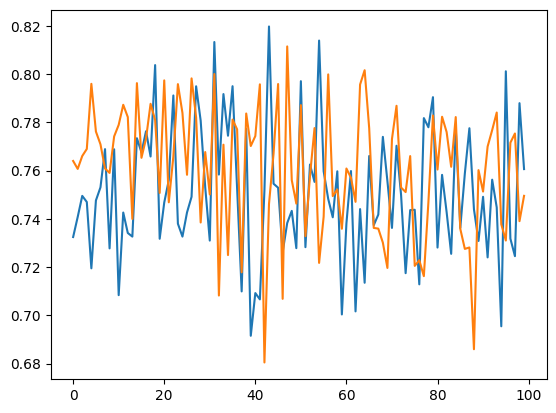

In [94]:
plt.plot(Loss)
plt.plot(Val_loss)
plt.show()

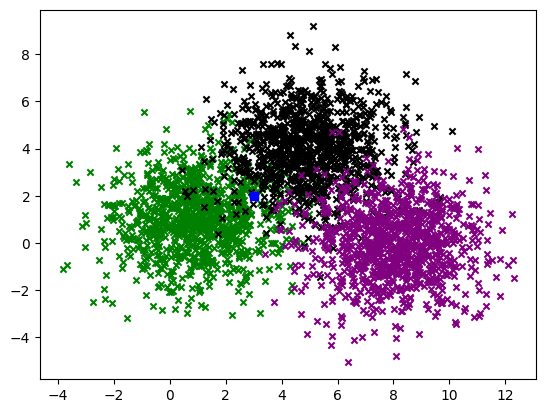

In [95]:
x=3.0
y=2.0
plt.scatter(x_label0, y_label0, c='green', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='purple', marker='x', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

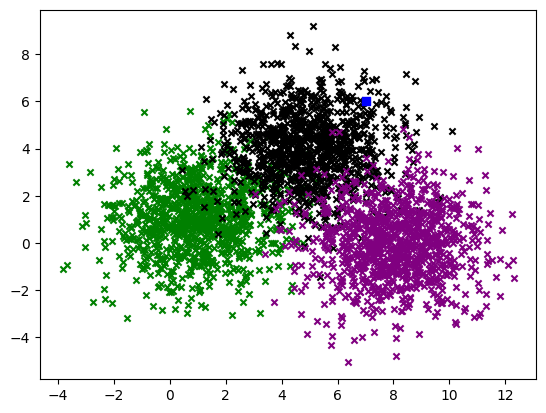

In [96]:
x=7.0
y=6.0
plt.scatter(x_label0, y_label0, c='green', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='purple', marker='x', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

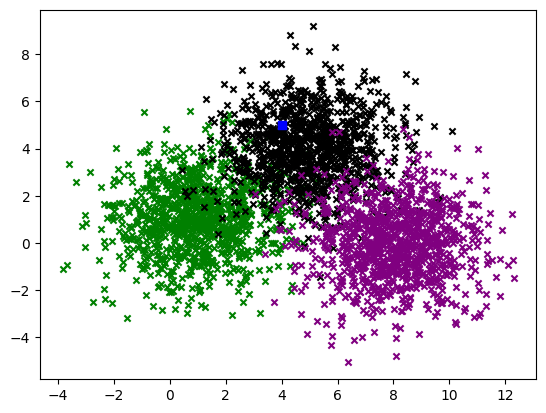

In [97]:
x=4.0
y=5.0
plt.scatter(x_label0, y_label0, c='green', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='purple', marker='x', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

#Number of epochs - 3000

In [98]:
Loss = []
Val_loss = []
epochs = 3000
learning_rate = 0.1
batch_size = 20

w = tf.Variable(np.random.random((2, 3)))
b = tf.Variable(np.random.random((3)))
data = points
data_train,label_train,data_val,label_val = split_dataset(data,labels,0.2)
for _ in range(epochs):

  data_batch,labels_batch = subset_dataset_concatenated(data_train,label_train,batch_size)
  data_val_batch,labels_val_batch = subset_dataset_concatenated(data_val,label_val,batch_size)

  with tf.GradientTape() as tape:

    pred_l=tf.nn.softmax(tf.matmul(data_batch, w) + b)
    pred_l_val=tf.nn.softmax(tf.matmul(data_val_batch, w) + b)


    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_batch, pred_l)
    Loss.append(loss.numpy())

    val_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_val_batch, pred_l_val)
    Val_loss.append(val_loss.numpy())

    print("loss",loss,"val_loss",val_loss)

  dloss_dw,dloss_db = tape.gradient(loss, [w, b])


  w.assign_sub(learning_rate*dloss_dw )
  b.assign_sub(learning_rate*dloss_db )

loss tf.Tensor(0.8175922036111469, shape=(), dtype=float64) val_loss tf.Tensor(0.7997335181224572, shape=(), dtype=float64)
loss tf.Tensor(0.7910792722324448, shape=(), dtype=float64) val_loss tf.Tensor(0.7964841210574397, shape=(), dtype=float64)
loss tf.Tensor(0.8231510414371108, shape=(), dtype=float64) val_loss tf.Tensor(0.8004597459732604, shape=(), dtype=float64)
loss tf.Tensor(0.8185600703732115, shape=(), dtype=float64) val_loss tf.Tensor(0.7818288618414992, shape=(), dtype=float64)
loss tf.Tensor(0.7813935804855989, shape=(), dtype=float64) val_loss tf.Tensor(0.7737047285340894, shape=(), dtype=float64)
loss tf.Tensor(0.7880478312744726, shape=(), dtype=float64) val_loss tf.Tensor(0.818497648427585, shape=(), dtype=float64)
loss tf.Tensor(0.8017992629434534, shape=(), dtype=float64) val_loss tf.Tensor(0.7873656757669056, shape=(), dtype=float64)
loss tf.Tensor(0.8098445793403114, shape=(), dtype=float64) val_loss tf.Tensor(0.7876443349199977, shape=(), dtype=float64)
loss tf.T

In [99]:
print(data_train.size,label_train.size,data_val.size,label_val.size)

4800 7200 1200 1800


In [100]:
print(data_train.shape,label_train.shape,data_val.shape,label_val.shape)

(2400, 2) (2400, 3) (600, 2) (600, 3)


In [101]:
np.max(Loss),np.min(Loss)

(0.8231510414371108, 0.5856957068522768)

In [102]:
np.max(Val_loss),np.min(Val_loss)

(0.818497648427585, 0.5868535143066557)

In [103]:
print(w.numpy())
print(b.numpy())

[[-0.34671909  0.45493384  0.99923588]
 [ 0.50051065  1.28724549 -0.12440768]]
[ 3.19977748 -0.61944005 -1.24581024]


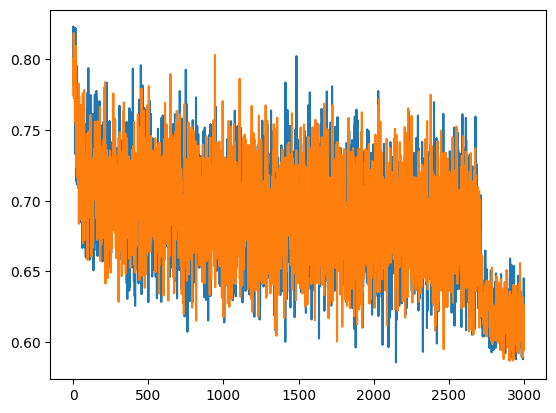

In [104]:
plt.plot(Loss)
plt.plot(Val_loss)
plt.show()

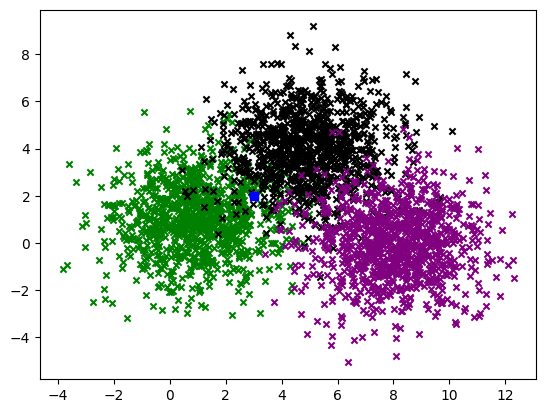

In [105]:
x=3.0
y=2.0
plt.scatter(x_label0, y_label0, c='green', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='purple', marker='x', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

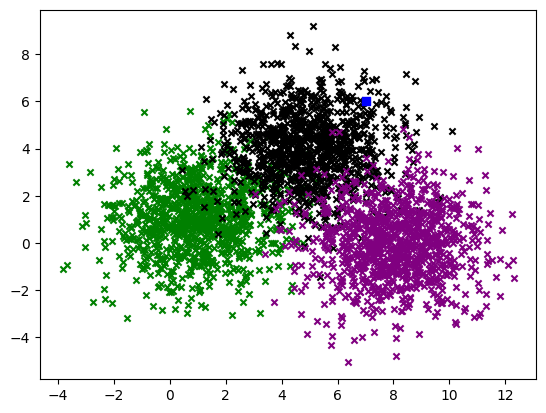

In [106]:
x=7.0
y=6.0
plt.scatter(x_label0, y_label0, c='green', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='purple', marker='x', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

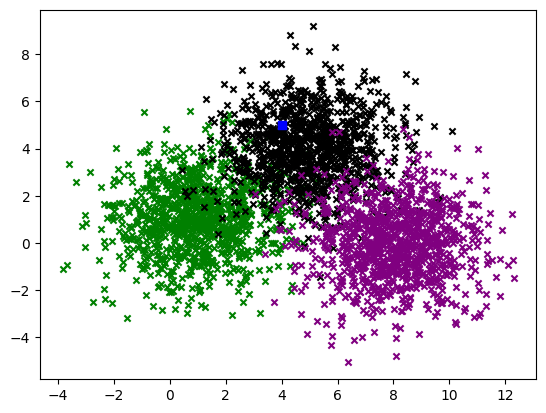

In [107]:
x=4.0
y=5.0
plt.scatter(x_label0, y_label0, c='green', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='purple', marker='x', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

#Minibatch

#Batch size - 10

In [108]:
Loss = []
Val_loss = []
epochs = 5000
learning_rate = 0.1
batch_size = 10

w = tf.Variable(np.random.random((2, 3)))
b = tf.Variable(np.random.random((3)))
data = points
data_train,label_train,data_val,label_val = split_dataset(data,labels,0.2)
for _ in range(epochs):

  data_batch,labels_batch = subset_dataset_concatenated(data_train,label_train,batch_size)
  data_val_batch,labels_val_batch = subset_dataset_concatenated(data_val,label_val,batch_size)

  with tf.GradientTape() as tape:

    pred_l=tf.nn.softmax(tf.matmul(data_batch, w) + b)
    pred_l_val=tf.nn.softmax(tf.matmul(data_val_batch, w) + b)


    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_batch, pred_l)
    Loss.append(loss.numpy())

    val_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_val_batch, pred_l_val)
    Val_loss.append(val_loss.numpy())

    print("loss",loss,"val_loss",val_loss)

  dloss_dw,dloss_db = tape.gradient(loss, [w, b])


  w.assign_sub(learning_rate*dloss_dw )
  b.assign_sub(learning_rate*dloss_db )

loss tf.Tensor(0.7280469905647189, shape=(), dtype=float64) val_loss tf.Tensor(0.722201749598604, shape=(), dtype=float64)
loss tf.Tensor(0.8158338771225301, shape=(), dtype=float64) val_loss tf.Tensor(0.7622490473828041, shape=(), dtype=float64)
loss tf.Tensor(0.7783891774774657, shape=(), dtype=float64) val_loss tf.Tensor(0.7086042190601084, shape=(), dtype=float64)
loss tf.Tensor(0.8596188835808027, shape=(), dtype=float64) val_loss tf.Tensor(0.7780989142295205, shape=(), dtype=float64)
loss tf.Tensor(0.7930851810280265, shape=(), dtype=float64) val_loss tf.Tensor(0.8063830993535831, shape=(), dtype=float64)
loss tf.Tensor(0.746774582256579, shape=(), dtype=float64) val_loss tf.Tensor(0.7022192876704716, shape=(), dtype=float64)
loss tf.Tensor(0.7533582338226179, shape=(), dtype=float64) val_loss tf.Tensor(0.7267400391603254, shape=(), dtype=float64)
loss tf.Tensor(0.782261719774058, shape=(), dtype=float64) val_loss tf.Tensor(0.7286037062658968, shape=(), dtype=float64)
loss tf.Ten

In [109]:
print(data_train.size,label_train.size,data_val.size,label_val.size)

4800 7200 1200 1800


In [110]:
print(data_train.shape,label_train.shape,data_val.shape,label_val.shape)

(2400, 2) (2400, 3) (600, 2) (600, 3)


In [111]:
np.max(Loss),np.min(Loss)

(0.8596188835808027, 0.5684671323075976)

In [112]:
np.max(Val_loss),np.min(Val_loss)

(0.8557337843902377, 0.5689930781802317)

In [113]:
print(w.numpy())
print(b.numpy())

[[-0.37357033  0.6104931   1.33421813]
 [ 0.39449509  1.70300704 -0.52705518]]
[ 4.71998902 -1.30802162 -1.43951778]


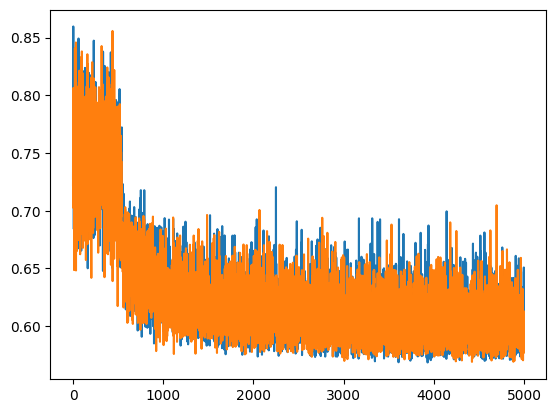

In [114]:
plt.plot(Loss)
plt.plot(Val_loss)
plt.show()

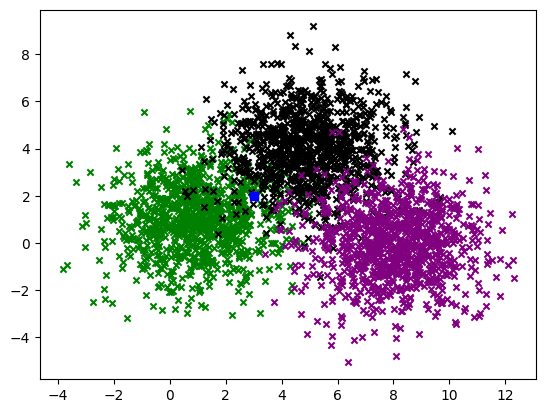

In [115]:
x=3.0
y=2.0
plt.scatter(x_label0, y_label0, c='green', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='purple', marker='x', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

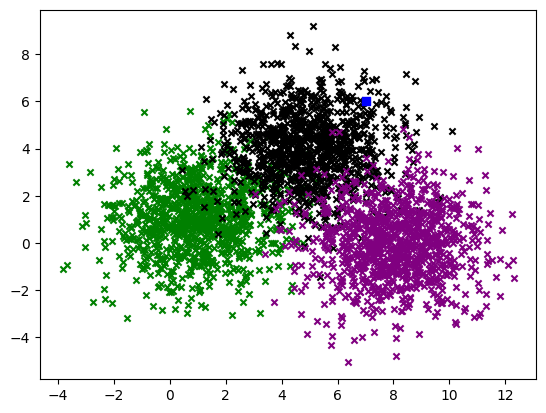

In [116]:
x=7.0
y=6.0
plt.scatter(x_label0, y_label0, c='green', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='purple', marker='x', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

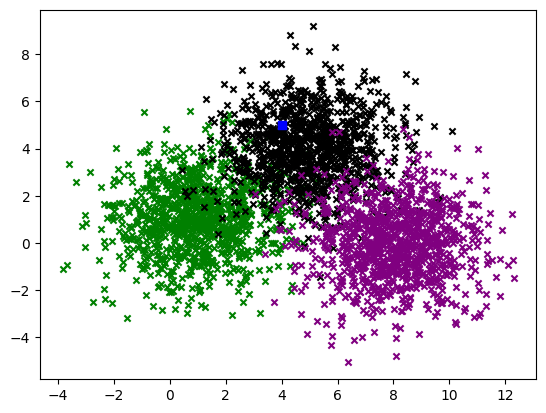

In [117]:
x=4.0
y=5.0
plt.scatter(x_label0, y_label0, c='green', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='purple', marker='x', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

#Batch size - 100

In [118]:
Loss = []
Val_loss = []
epochs = 5000
learning_rate = 0.1
batch_size = 100

w = tf.Variable(np.random.random((2, 3)))
b = tf.Variable(np.random.random((3)))
data = points
data_train,label_train,data_val,label_val = split_dataset(data,labels,0.2)
for _ in range(epochs):

  data_batch,labels_batch = subset_dataset_concatenated(data_train,label_train,batch_size)
  data_val_batch,labels_val_batch = subset_dataset_concatenated(data_val,label_val,batch_size)

  with tf.GradientTape() as tape:

    pred_l=tf.nn.softmax(tf.matmul(data_batch, w) + b)
    pred_l_val=tf.nn.softmax(tf.matmul(data_val_batch, w) + b)


    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_batch, pred_l)
    Loss.append(loss.numpy())

    val_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(labels_val_batch, pred_l_val)
    Val_loss.append(val_loss.numpy())

    print("loss",loss,"val_loss",val_loss)

  dloss_dw,dloss_db = tape.gradient(loss, [w, b])


  w.assign_sub(learning_rate*dloss_dw )
  b.assign_sub(learning_rate*dloss_db )

loss tf.Tensor(0.732995572965101, shape=(), dtype=float64) val_loss tf.Tensor(0.7217804567592655, shape=(), dtype=float64)
loss tf.Tensor(0.725850722815791, shape=(), dtype=float64) val_loss tf.Tensor(0.7164146877380628, shape=(), dtype=float64)
loss tf.Tensor(0.7243888383372138, shape=(), dtype=float64) val_loss tf.Tensor(0.7252964952039491, shape=(), dtype=float64)
loss tf.Tensor(0.7243959126607998, shape=(), dtype=float64) val_loss tf.Tensor(0.7046885995341731, shape=(), dtype=float64)
loss tf.Tensor(0.7241332103095437, shape=(), dtype=float64) val_loss tf.Tensor(0.7267592620981006, shape=(), dtype=float64)
loss tf.Tensor(0.7388355828034727, shape=(), dtype=float64) val_loss tf.Tensor(0.7132745370168414, shape=(), dtype=float64)
loss tf.Tensor(0.7244626785684741, shape=(), dtype=float64) val_loss tf.Tensor(0.7227923624964473, shape=(), dtype=float64)
loss tf.Tensor(0.7233428353147601, shape=(), dtype=float64) val_loss tf.Tensor(0.7148989953496229, shape=(), dtype=float64)
loss tf.Te

In [119]:
print(data_train.size,label_train.size,data_val.size,label_val.size)

4800 7200 1200 1800


In [120]:
print(data_train.shape,label_train.shape,data_val.shape,label_val.shape)

(2400, 2) (2400, 3) (600, 2) (600, 3)


In [121]:
np.max(Loss),np.min(Loss)

(0.7388355828034727, 0.5878175165374722)

In [122]:
np.max(Val_loss),np.min(Val_loss)

(0.7267592620981006, 0.5840680254615334)

In [123]:
print(w.numpy())
print(b.numpy())

[[-0.49087696  0.50240524  1.26525779]
 [ 0.78001928  2.00482169 -0.16051308]]
[ 4.60660195 -1.33980762 -1.80413557]


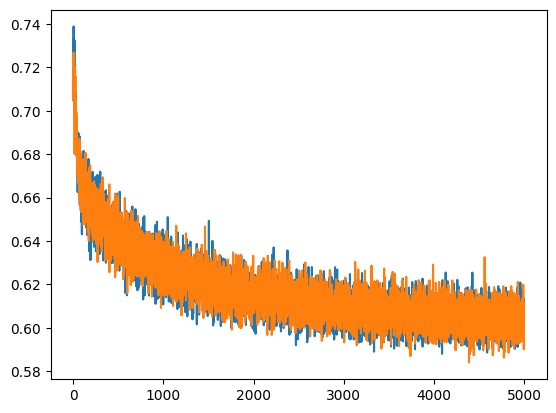

In [124]:
plt.plot(Loss)
plt.plot(Val_loss)
plt.show()

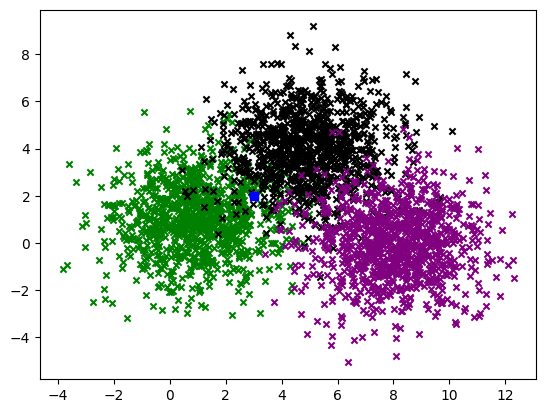

In [125]:
x=3.0
y=2.0
plt.scatter(x_label0, y_label0, c='green', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='purple', marker='x', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

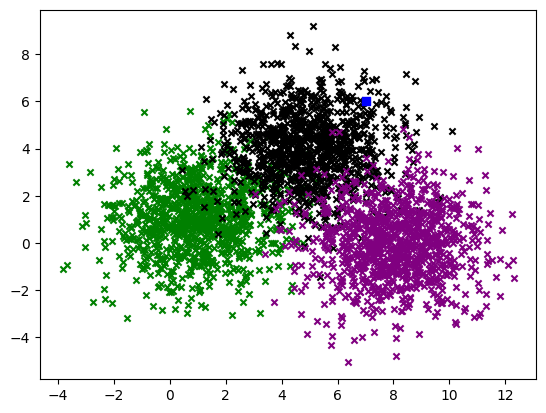

In [126]:
x=7.0
y=6.0
plt.scatter(x_label0, y_label0, c='green', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='purple', marker='x', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

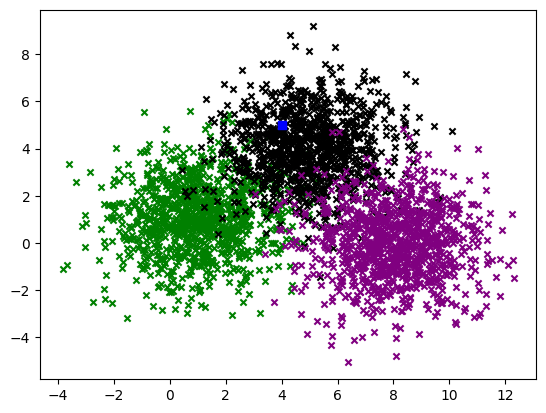

In [127]:
x=4.0
y=5.0
plt.scatter(x_label0, y_label0, c='green', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='black', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='purple', marker='x', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

Najlepsze wyniki otrzymałem dla współczynnika uczenia 0.1, liczby epok 5000, batcha równego 20, najgorsze dla współczynnika uczenia 0.001, liczby epok 100, batcha równego 100.

I got the best results for a learning rate of 0.1, a number of epochs of 5000, a batch of 20, and the worst for a learning rate of 0.001, a number of epochs of 100, a batch of 100.